# COVID Correct Hand Washing Prediction System

### 1. Import required Libraries:

In [ ]:
import cv2

This library allows us to work with both images, and videos.

In [ ]:
import numpy as np

We use numpy to work with arrays. This library comes with functions for working with linear algebra, fourier transform, and matrices.

In [ ]:
import os

We use the os library to interact with the operating system.

In [ ]:
import glob

This library allows us to to search for files that match a specific file pattern or even a name.

In [ ]:
import tensorflow as tf

We need to library as this library helps us build and develop our model.

In [ ]:
from tensorflow.keras.models import Sequential
from keras.regularizers import l2
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

We need to import the layers and what model we will use from keras which will help us build our convolutional neural network.

In [ ]:
import matplotlib.pyplot as plt

This library is so that we can visualise our data through the use of graphs.

In [ ]:
from sklearn.model_selection import train_test_split

The train_test_split function allows us to split the date set into training and testing sets for our modelling.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

### 1.1 Global Variables:

In [ ]:
data = []
labels = []

These lists are what we will be storing our Image data in, and our image labels

### 2. Labelling Errors:

<ol>
  <li>Explain what kind of errors you found in the dataset.</li>

*   Duplicate Images

   * Some identical copies and identical versions were present both, within and, between categories.
*   Corrupt/Unreadable images

   * Several images could not load because of file errors resulting in image errors.

*   Handling

  *  Removed any nearly identical images.
  *  Ensured robust handling of errors while loading images.
  *  Labeled images, in each folder with the stage label ranging from 0 to 7.
  *  Eliminated any irreparably corrupted images, from the collection.

*   This helped create a cleanly labeled dataset with:

   * Ensure that all files can be parsed without any issues.
   * Make sure the labels are accurately associated with the stages.

  <li>List the total number of images left in each class/stage after the label error handling</li>
</ol>

<br>

<ol>
  <li>Stage 1: <<328 Images>></li>
  <li>Stage 2: <<438 Images>></li>
  <li>Stage 3: <<504 Images>></li>
  <li>Stage 4: <<484 Images>></li>
  <li>Stage 5: <<500 Images>></li>
  <li>Stage 6: <<514 Images>></li>
  <li>Stage 7: <<486 Images>></li>
  <li>Stage 8: <<516 Images>></li>

  Total Images: <<3,770 Images>>
</ol>

### 3. Loading the data:

In [ ]:
img_size = (150, 150,3)

We are defining the target size for our images as 150×150 pixels with three colour channels (red, green and blue).

In [ ]:
Stage1 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessments/Assignment Two/CHS2406_Coursework2_Data_Repository/Stage1/*.*')

We need to use glob to get filepaths matching images in our Stage1 folder.

Then the same goes for the rest of the folders.

In [ ]:
Stage2 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessments/Assignment Two/CHS2406_Coursework2_Data_Repository/Stage2/*.*')
Stage3 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessments/Assignment Two/CHS2406_Coursework2_Data_Repository/Stage3/*.*')
Stage4 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessments/Assignment Two/CHS2406_Coursework2_Data_Repository/Stage4/*.*')
Stage5 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessments/Assignment Two/CHS2406_Coursework2_Data_Repository/Stage5/*.*')
Stage6 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessments/Assignment Two/CHS2406_Coursework2_Data_Repository/Stage6/*.*')
Stage7 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessments/Assignment Two/CHS2406_Coursework2_Data_Repository/Stage7/*.*')
Stage8 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessments/Assignment Two/CHS2406_Coursework2_Data_Repository/Stage8/*.*')

Here we are doing a few things:

* We begin by unloading the image data.

* Next we convert the image into an array.

* After that we store the numpy image data in a list.

In [ ]:
for i in Stage1:
  image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size = img_size)
  image=np.array(image)
  data.append(image)
  labels.append(0)

We are doing the same thing for the rest of the stages.

In [ ]:
for i in Stage2:
  image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size = img_size)
  image=np.array(image)
  data.append(image)
  labels.append(1)

for i in Stage3:
  image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size = img_size)
  image=np.array(image)
  data.append(image)
  labels.append(2)

for i in Stage4:
  image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size = img_size)
  image=np.array(image)
  data.append(image)
  labels.append(3)

for i in Stage5:
  image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size = img_size)
  image=np.array(image)
  data.append(image)
  labels.append(4)

for i in Stage6:
  image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size = img_size)
  image=np.array(image)
  data.append(image)
  labels.append(5)

for i in Stage7:
  image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size = img_size)
  image=np.array(image)
  data.append(image)
  labels.append(6)

for i in Stage8:
  image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size = img_size)
  image=np.array(image)
  data.append(image)
  labels.append(7)

data = np.array(data)
labels = np.array(labels)

### 4. Split the data:
<br>

First we need to divide the data into three sets; training, validation and testing. We'll use stratification to ensure that each set has a distribution of classes.

Next we should determine the sizes, for our training, validation and testing datasets based on our needs and requirements.

Lastly lets display the number of images, in each dataset to have an understanding of the data distribution.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

Firstly, we split the data, so 20% of the original images are for testing, and we are using stratify to maintain equal labels in both test and train.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

Then, from the remaining training data, we take another 20% for our validation data, and again we are using stratify for the same reason.

In [ ]:
# Print distributions
print("Total training instances:", len(y_train))
print("\nTraining set distribution:", np.unique(y_train, return_counts=True))

print("\nTotal validation instances:", len(y_val))
print("Validation set distribution:", np.unique(y_val, return_counts=True))

print("\nTotal testing instances:", len(y_test))
print("Test set distribution:", np.unique(y_test, return_counts=True))

Total training instances: 2412

Training set distribution: (array([0, 1, 2, 3, 4, 5, 6, 7]), array([210, 280, 322, 310, 320, 329, 311, 330]))

Total validation instances: 604
Validation set distribution: (array([0, 1, 2, 3, 4, 5, 6, 7]), array([53, 70, 81, 77, 80, 82, 78, 83]))

Total testing instances: 754
Test set distribution: (array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 65,  88, 101,  97, 100, 103,  97, 103]))


Here we can see our classes which all have the same label distribution.

If you look closely at your array, it shows that we have near enough an equal balance of images in each class which is fairly decent.

In [ ]:
print("Total Training Images:", len(X_train))
print("Total Validation Images:", len(X_val))
print("Total Testing Images:", len(X_test))

Total Training Images: 2412
Total Validation Images: 604
Total Testing Images: 754


We need to see how many images images are for training, testing and validation.

### 5. Data Pre-Processing:

• Reshape Dataset

In [ ]:
print("\n\nBefore Reshaping:")
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)



Before Reshaping:
(2412, 150, 150, 3)
(604, 150, 150, 3)
(754, 150, 150, 3)


Here we print out the original shape of the train, validation and test image arrays before reshaping.

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 150, 150, 3))
X_val = X_val.reshape((X_val.shape[0], 150, 150, 3))
X_test = X_test.reshape((X_test.shape[0], 150, 150, 3))

We are currently rearranging our data from each set, which essentially involves organising the data into rows and columns. This step is necessary, before constructing our CNN model.

The values 150, 150 3 represent:

* Width; The number of pixels x axis.

* Height; The number of pixels y axis.

* Channels; A representation, for colors (RGB = 3 channels. Red, Green, Blue).



In [ ]:
print("After Reshaping:")
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

After Reshaping:
(2412, 150, 150, 3)
(604, 150, 150, 3)
(754, 150, 150, 3)


Here is the result, after we have shaped the train, validation and test image sets.

• Visualising the Data

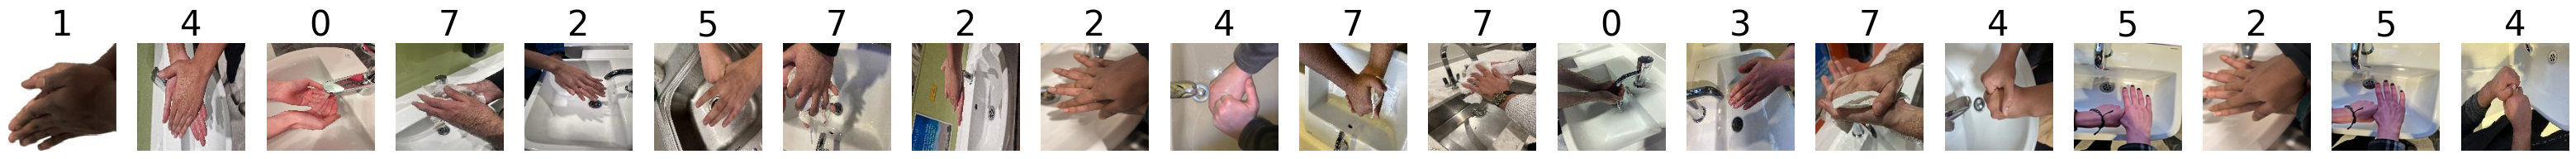

In [ ]:
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = X_train[i]
    label = y_train[i]

    image = row
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

It's always really good to visualise the data, so then we get an indication of what we are working with and how we can work with it.

• Normalising the Image Data

In [ ]:
# Convert the array to float32 as opposed to uint8
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

We are normalising the image pixel values to the 0-1 range.

In [ ]:
# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
X_train /= 255
X_val /= 255
X_test /=  255

Afterward it takes each pixel. Divides it by 255. This transforms the intensity values of the pixels, which range from 0, to 255, as integers into a scale ranging from 0 to 1 as floating point numbers.

• Categorise/Encoding Labels

In [ ]:
NUM_CLASSES = 10

This is the number of classes in our data set.

In [ ]:
print("Before label conversion to categorical: ", y_train[0:5])

Before label conversion to categorical:  [1 4 0 7 2]


We now prints the first five labels before conversion, which will be integers between zero and nine.

In [ ]:
y_train  = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)

Now we convert the labels to categorical format with the 10 classes.

In [ ]:
print("Before label conversion to categorical: ", y_val[0:5])
y_val  = tf.keras.utils.to_categorical(y_val, NUM_CLASSES)

print("After label conversion to categorical: ", y_train[0:5])
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

Before label conversion to categorical:  [1 7 0 3 2]
After label conversion to categorical:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Now we do the same for the other sets we have.

### 6. Convolutional Neural Network:

In [ ]:
model = Sequential()

Here we are creating a sequential Keras model to add layers sequentially.

In [ ]:
model.add(Conv2D(64, (5, 5), strides=1, padding="same", activation="relu", input_shape=img_size))

This implies:

* We will be utilising 64 filters to identify features.
* The size of the kernel is 5x5.
* The stride value is set to 1.
* To preserve dimensions we will apply the padding technique.
* An activation function called ReLU will be used.
* The input shape is determined by the size of the image.

In [ ]:
model.add(MaxPool2D((2, 2), strides=2, padding="same"))

This implies


* It decreases the dimensions by half.
* It contributes to making the representations resistant, to changes, in position.


In [ ]:
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))

This implies:


* We can use 32 filters to examine patterns.
* Implement a 3x3 kernel.
* Keep the remaining parameters the same, as the layer.


In [ ]:
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))

In [ ]:
model.add(BatchNormalization())

This implies:



* Batch normalisation is used to stabilise the outputs of each layer.
* It also ensures propagation by normalizing the activation outputs.
* This technique helps the network train efficiently and quickly.


In [ ]:
model.add(MaxPool2D((2, 2), strides=2, padding="same"))

In [ ]:
model.add(Flatten())

This reduces the input data into a single dimension instead of 2 dimensions. This doesn't affect the batch size.

In [ ]:
model.add(Dense(units=264, activation="relu", kernel_regularizer=l2(0.001)))

This implies:


* A layer that is completely connected
* 264 units of neurons
* Weights, with L2 regularisation
* Activation using Rectified Linear Unit (ReLU)


In [ ]:
model.add(Dropout(0.3))

This implies:


* Around 30% of the activations are randomly set to zero.
* This helps ensure robustness by preventing overfitting.


In [ ]:
model.add(Dense(units=128, activation="relu"))

This implies:

* Second hudden layer
* A total of 128 units are assigned to this layer
* The activation function used for this layer is ReLU


In [ ]:
model.add(Dense(units=NUM_CLASSES, activation="softmax"))

This implies:

* Output classification layer
* Utilise UNIT_CLASSES nodes.
* Apply softmax to obtain multiclass probability outputs.


### 7. Data Augmentation:

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,  # Randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zooms or stretches images by 10% during training. Makes model robust.
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=False, # Don't flip vertically.
)

• Batch Size

In [ ]:
batch_size = 32

Here we are definining the batch size which is the number of images to process together.

In [ ]:
img_iter = datagen.flow(X_train, y_train, batch_size=batch_size)

This creates an iterator that generates augmented images from train set batch-wise.

In [ ]:
x, y = img_iter.next()

Get a batch of images (x) and labels (y).

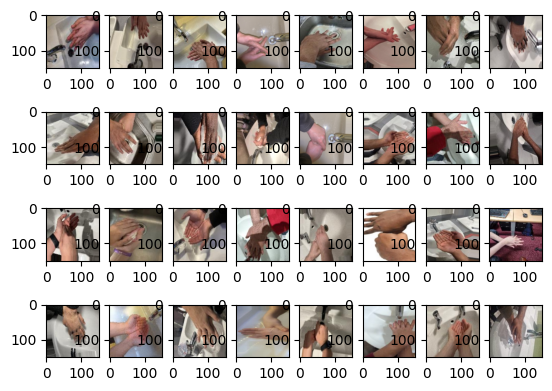

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=8) # Initialise a grid of subplots to visualize images
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

This implies:

* Retrieve the i th image.
* Plot the image in the subplot.
* Use the squeeze() function to remove the color channel depth.
* Display a grid of images.


### 8. Train the model:

In [ ]:
datagen.fit(X_train)

Now lets train our model.

• Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 25)        7225      
                                                                 
 batch_normalization (Batch  (None, 38, 38, 25)        1

Here is a summary of the architecture of the CNN model;

* It provides information, about the sequence of layers.
* It shows the output shape of each layer for example (None, 32 32 3).
* You can also find the number of parameters, in each layer.

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

To prepare the CNN model, for training we use the model.compile() function. It sets up the loss function, optimiser and metrics to track during the training process.

The categorical crossentropy loss function calculates the difference between the predicted distributions and the actual label distributions.

We utilise RMSprop as our optimisation algorithm to adjust weights and minimise the loss function.

Accuracy is a metric that measures the percentage of category predictions, across all predictions.

In [ ]:
history = model.fit(img_iter,
          epochs=50, # Train for 50 full passes over the data. More epochs leads to more learning, but can overfit.
          steps_per_epoch=len(X_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(X_val, y_val)) # The static validation images/labels for periodic evaluation. Monitor loss/accuracy here.

Epoch 1/50
75/75 [==============================] - 23s 206ms/step - loss: 2.7384 - accuracy: 0.1376 - val_loss: 2.6063 - val_accuracy: 0.1440
Epoch 2/50
75/75 [==============================] - 15s 198ms/step - loss: 2.4200 - accuracy: 0.1534 - val_loss: 2.3987 - val_accuracy: 0.1159
Epoch 3/50
75/75 [==============================] - 15s 192ms/step - loss: 2.2857 - accuracy: 0.1459 - val_loss: 2.3001 - val_accuracy: 0.1325
Epoch 4/50
75/75 [==============================] - 15s 193ms/step - loss: 2.1986 - accuracy: 0.1658 - val_loss: 2.2012 - val_accuracy: 0.1507
Epoch 5/50
75/75 [==============================] - 14s 192ms/step - loss: 2.1452 - accuracy: 0.1733 - val_loss: 2.1451 - val_accuracy: 0.1937
Epoch 6/50
75/75 [==============================] - 14s 190ms/step - loss: 2.0997 - accuracy: 0.1874 - val_loss: 2.4441 - val_accuracy: 0.1490
Epoch 7/50
75/75 [==============================] - 14s 192ms/step - loss: 2.0914 - accuracy: 0.2102 - val_loss: 2.1429 - val_accuracy: 0.1772

### 9. Model Evaluation:

In [ ]:
y_pred = model.predict(X_test)

24/24 [==============================] - 1s 23ms/step


Lets make the prediction on all the unseen images.

In [ ]:
#Convert class attribute back to its origional form, 0,1 from categorical [1. 0., 0. 1.]
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])

y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

[4 6 1 1 2 3 1 3 7 0 2 6 3 7 7 1 3 5 6 3 2 3 5 0 5]
[3 7 5 1 3 3 3 3 7 0 2 6 3 7 2 4 3 7 6 2 3 2 5 0 5]


Convert the labels back, into integers and display the first 25 actual and predicted labels, for visual inspection.

In [ ]:
#Accuracy of the model on test dataset
print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        65
           1       0.27      0.24      0.25        88
           2       0.32      0.55      0.41       101
           3       0.34      0.40      0.37        97
           4       0.59      0.60      0.60       100
           5       0.59      0.42      0.49       103
           6       0.65      0.42      0.51        97
           7       0.53      0.45      0.49       103

    accuracy                           0.46       754
   macro avg       0.50      0.47      0.47       754
weighted avg       0.49      0.46      0.47       754

[[44  3 10  6  2  0  0  0]
 [ 5 21 33 14  7  3  2  3]
 [ 1 12 56 20  1  3  0  8]
 [ 2 10 35 39  4  4  0  3]
 [ 4  7  6  4 60  9  7  3]
 [ 4  7  6  7 15 43  7 14]
 [ 6  7  5 15  6  8 41  9]
 [ 1 10 22  9  6  3  6 46]]
0.46419098143236076


Now lets take a look, at the metrics we have:

* Classification report; precision, recall and f1 score, for each class
* Confusion matrix; breakdown of versus predicted results
* Accuracy percentage

### 10. Training Curves:

• History for Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


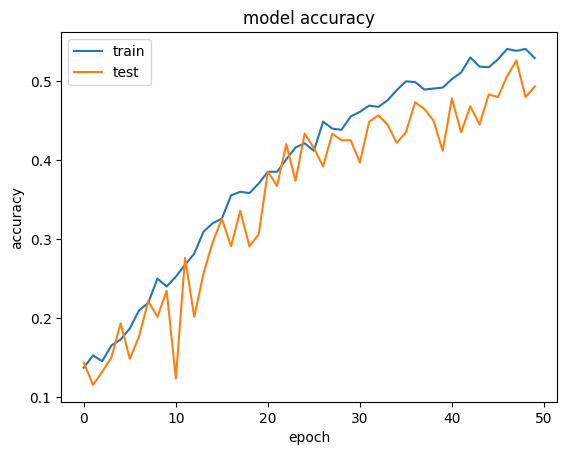

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'], label="Training")
plt.plot(history.history['val_accuracy'], label ="Validation")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

• History for Loss

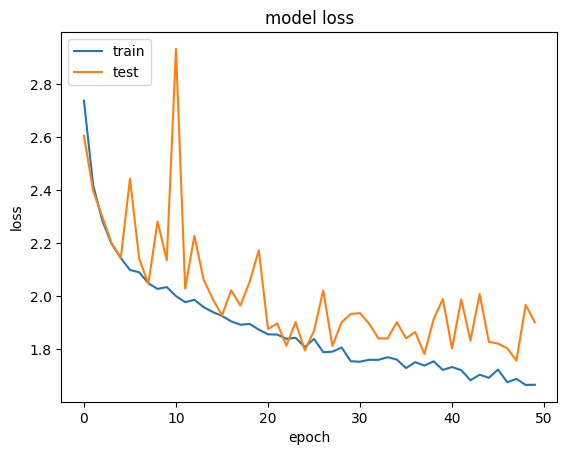

In [ ]:
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label ="Validation")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 11. Model Prediction:

In [ ]:
from tensorflow.keras.preprocessing import image


def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=img_size) # This loads the image and resizes to required input dimensions

    img_array = image.img_to_array(img_) # Converts the image to a numpy array

    img_processed = np.expand_dims(img_array, axis=0) # Expands dims to add batch axis
    img_processed /= 255. # Nornmalises pixel values to 0-1

    prediction = model.predict(img_processed) # Gets the prediction probabilities

    index = np.argmax(prediction) # Get index of maximum prediction value = predicted class

    plt.title("Model Prediction Stage - {}".format(str(index).title()), size=18, color='red')
    plt.imshow(img_array)

1/1 [==============================] - 0s 197ms/step


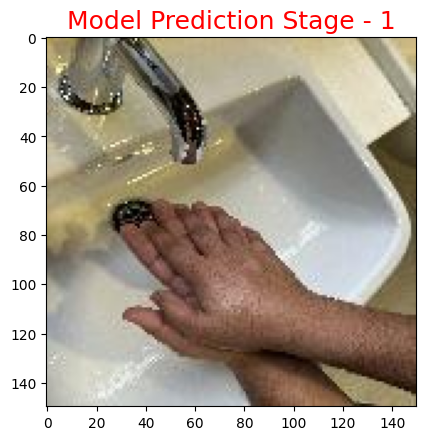

In [ ]:
predict_image('/content/drive/MyDrive/Colab Notebooks/Assessments/Assignment Two/CHS2406_Coursework2_Data_Repository/Stage4/10_Stage_4_U1976820.jpg', model)

Here we are testing the model by giving it an image to make a prediction on.